In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Collection

In [2]:
df = pd.read_csv('customer_booking.csv', encoding='latin-1')
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

## Data Eksploration

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [4]:
df.describe()

num_passengers  purchase_lead  length_of_stay  flight_hour  \
count    50000.000000   50000.000000     50000.00000  50000.00000   
mean         1.591240      84.940480        23.04456      9.06634   
std          1.020165      90.451378        33.88767      5.41266   
min          1.000000       0.000000         0.00000      0.00000   
25%          1.000000      21.000000         5.00000      5.00000   
50%          1.000000      51.000000        17.00000      9.00000   
75%          2.000000     115.000000        28.00000     13.00000   
max          9.000000     867.000000       778.00000     23.00000   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
count         50000.000000          50000.000000           50000.000000   
mean              0.668780              0.296960               0.427140   
std               0.470657              0.456923               0.494668   
min               0.000000              0.000000               0.000000   
25%               0.000000              0.000000               0.000000   
50%               1.000000              0.000000               0.000000   
75%               1.000000              1.000000               1.000000   
max               1.000000              1.000000               1.000000   

       flight_duration  booking_complete  
count     50000.000000      50000.000000  
mean          7.277561          0.149560  
std           1.496863          0.356643  
min           4.670000          0.000000  
25%           5.620000          0.000000  
50%           7.570000          0.000000  
75%           8.830000          0.000000  
max           9.500000          1.000000

In [5]:
df.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [6]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [7]:
df.shape

(50000, 14)

In [8]:
# show unique value
print(df['booking_complete'].unique())
print(df['sales_channel'].unique())
print(df['trip_type'].unique())
print(df['flight_day'].unique())

[0 1]
['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']
['Sat' 'Wed' 'Thu' 'Mon' 'Sun' 'Tue' 'Fri']


## EDA

### Univariate analysis
Distribution of category columns

In [9]:
import plotly.express as px
import plotly.io as pio

cat_cols = ['sales_channel','trip_type','flight_day','wants_extra_baggage',
            'wants_preferred_seat','wants_in_flight_meals','booking_complete']

for col in cat_cols:
    fig = px.pie(df, names=col, title=f'{col} distribution')
    pio.show(fig)

In [10]:
# 
origin_counts = df.booking_origin.value_counts()
top_origins = origin_counts[origin_counts>100]

fig = px.bar(x=top_origins.index, y=top_origins.values)
fig.show()

In [11]:
# Distribution of continuous variables
num_cols = ['purchase_lead','length_of_stay','flight_hour','flight_duration']

for col in num_cols:
    fig = px.histogram(df, x=col, title=f'{col} distribution')
    fig.show()

### Bi-Variate analysis

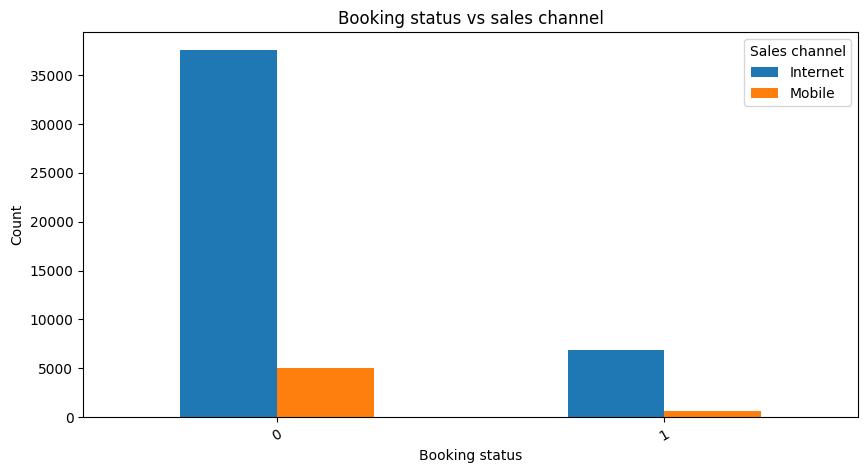

In [12]:
# Booking complete vs sales channel

channel_sales = df.groupby('booking_complete')['sales_channel'].value_counts()

channel_sales.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
plt.xlabel('Booking status')
plt.ylabel('Count')
plt.title('Booking status vs sales channel')
plt.legend(title='Sales channel')
plt.xticks(rotation = 30)
plt.show()

from the bar plot above, the distribution of bookings vs sales_channel mostly uses the internet

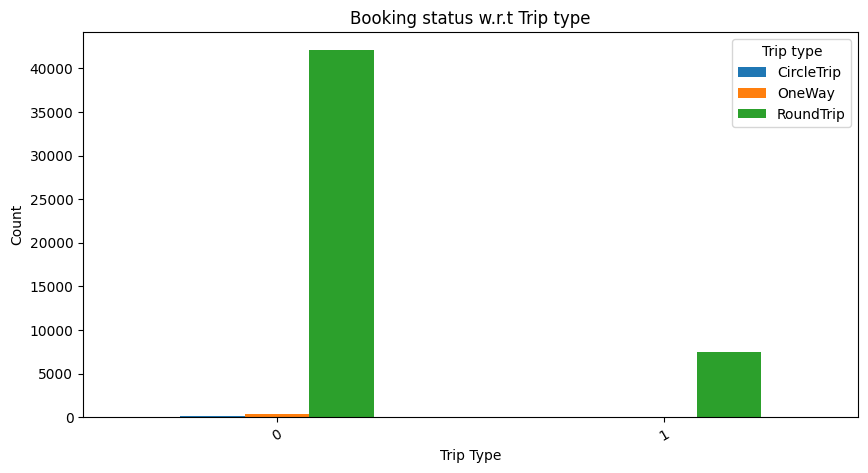

In [13]:
# Booking status vs Trip type
trip_type = df.groupby('booking_complete')['trip_type'].value_counts()

trip_type.unstack().plot(kind='bar', stacked=False, figsize=(10, 5))
plt.xlabel('Trip Type')
plt.ylabel('Count')
plt.title('Booking status w.r.t Trip type')
plt.legend(title='Trip type')
plt.xticks(rotation = 30)
plt.show()

The bar plot above shows that most people book tickets for `round trip`, while `one way` is very rare and `circle trip` is non-existent.

Text(0, 0.5, 'Number of complete bookings')

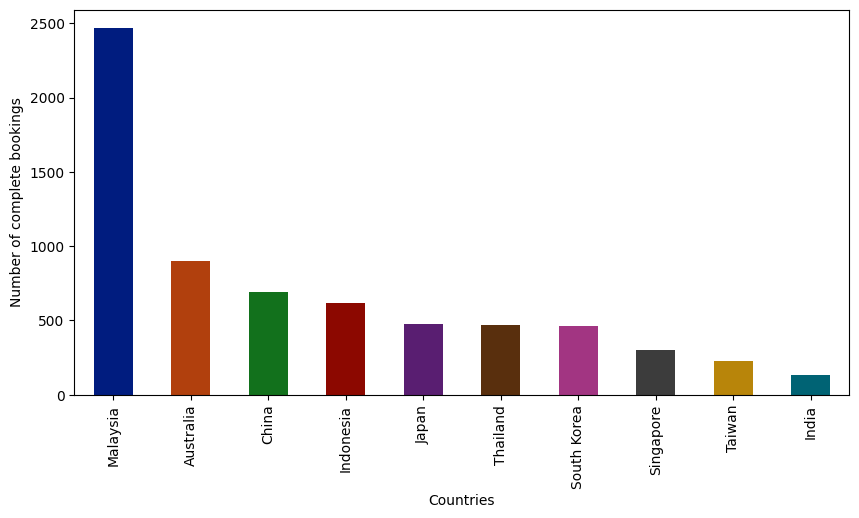

In [14]:
# Top 20 countries with highest number of complete bookings
plt.figure(figsize=(10,5))
ax = df[df.booking_complete ==1].booking_origin.value_counts()[:10].plot(kind="bar", color = sns.color_palette("dark"))
ax.set_xlabel("Countries")
ax.set_ylabel("Number of complete bookings")

Text(0, 0.5, 'Number of complete bookings')

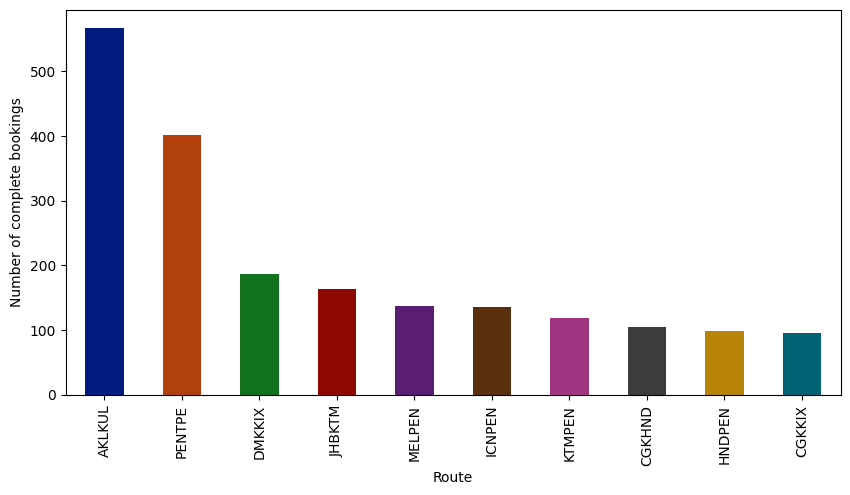

In [15]:
# Top 20 routes with complete bookings
plt.figure(figsize=(10,5))
ax = df[df.booking_complete ==1].route.value_counts()[:10].plot(kind="bar", color = sns.color_palette("dark"))
ax.set_xlabel("Route")
ax.set_ylabel("Number of complete bookings")

## Data Pre-processing

In [16]:
df.head()

num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [17]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
labelencoder = LabelEncoder()
df['sales_channel'] = labelencoder.fit_transform(df['sales_channel'])
df['sales_channel'].unique()

array([0, 1])

In [20]:
df['trip_type'] = labelencoder.fit_transform(df['trip_type'])
df['flight_day'] = labelencoder.fit_transform(df['flight_day'])
df['route'] = labelencoder.fit_transform(df['route'])
df['booking_origin'] = labelencoder.fit_transform(df['booking_origin'])

df['trip_type'].unique()

array([2, 0, 1])

In [21]:
df['flight_day'].unique()

array([2, 6, 4, 1, 3, 5, 0])

In [22]:
df['route'].unique()

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34,  36,  37,  38,  39,  41,  42,
        43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,  55,
        56,  57,  58,  59,  60,  61,  62,  64,  65,  66,  67,  68,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  79,  80,  81,  82,  83,
        84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
        97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 121, 122, 125,
       126, 127, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140,
       141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153,
       154, 155, 157, 158, 159, 160, 161, 162, 163, 165, 166, 167, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       185, 187, 188, 189, 190, 192, 193, 194, 195, 196, 197, 19

In [23]:
df['booking_origin'].unique()

array([ 61,  36, 100,  17,  85,  43,  51,  80,  90,  28,  37,  21, 103,
        93,  86,  75,  40,  42,  81,  99,  95,  77,   0,  78,  59,  74,
        34,  71,  87,  27,  19, 101,  48,  35,  73,  20,   4,  14,  72,
         9,  65,   7,  45,  11,  97,  46,  91,  12,  16,  13,  98,  23,
        18,  38,   6,  83,  82,  54,  58,  76,  47,  55,  89,   5,  49,
        44,  31,  56,  15,  92,  70,  94,   3,  60,  50,  57,  64,  67,
        10,  63,  26,  62,  52,  24,  41,  96,  84,  68,  69,  25,  79,
         1,  32,  22,  53, 102,   8,  66,  39,  29,  30,  33,   2,  88])

In [24]:
df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2              0          2            262              19   
1               1              0          2            112              20   
2               2              0          2            243              22   
3               1              0          2             96              31   
4               2              0          2             68              22   

   flight_hour  flight_day  route  booking_origin  wants_extra_baggage  \
0            7           2      0              61                    1   
1            3           2      0              61                    0   
2           17           6      0              36                    1   
3            4           2      0              61                    0   
4           15           6      0              36                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                     0                      0             5.52   
1                     0                      0             5.52   
2                     1                      0             5.52   
3                     0                      1             5.52   
4                     0                      1             5.52   

   booking_complete  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [25]:
from sklearn.preprocessing import StandardScaler

#create a standard scaler object
scaler = StandardScaler()

#fit and transform the data
scaled_df = scaler.fit_transform(df)

In [26]:
#create a dataframe of scled data
scaled_df = pd.DataFrame(scaled_df, columns = df.columns)

In [27]:
scaled_df.head()

num_passengers  sales_channel  trip_type  purchase_lead  length_of_stay  \
0        0.400684      -0.355785   0.095325       1.957530       -0.119353   
1       -0.579559      -0.355785   0.095325       0.299164       -0.089844   
2        0.400684      -0.355785   0.095325       1.747470       -0.030824   
3       -0.579559      -0.355785   0.095325       0.122272        0.234761   
4        0.400684      -0.355785   0.095325      -0.187290       -0.030824   

   flight_hour  flight_day     route  booking_origin  wants_extra_baggage  \
0    -0.381764   -0.527073 -1.724217        0.694118             0.703747   
1    -1.120780   -0.527073 -1.724217        0.694118            -1.420965   
2     1.465775    1.443552 -1.724217       -0.069097             0.703747   
3    -0.936026   -0.527073 -1.724217        0.694118            -1.420965   
4     1.096267    1.443552 -1.724217       -0.069097             0.703747   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0             -0.649919              -0.863497        -1.174175   
1             -0.649919              -0.863497        -1.174175   
2              1.538654              -0.863497        -1.174175   
3             -0.649919               1.158082        -1.174175   
4             -0.649919               1.158082        -1.174175   

   booking_complete  
0         -0.419359  
1         -0.419359  
2         -0.419359  
3         -0.419359  
4         -0.419359

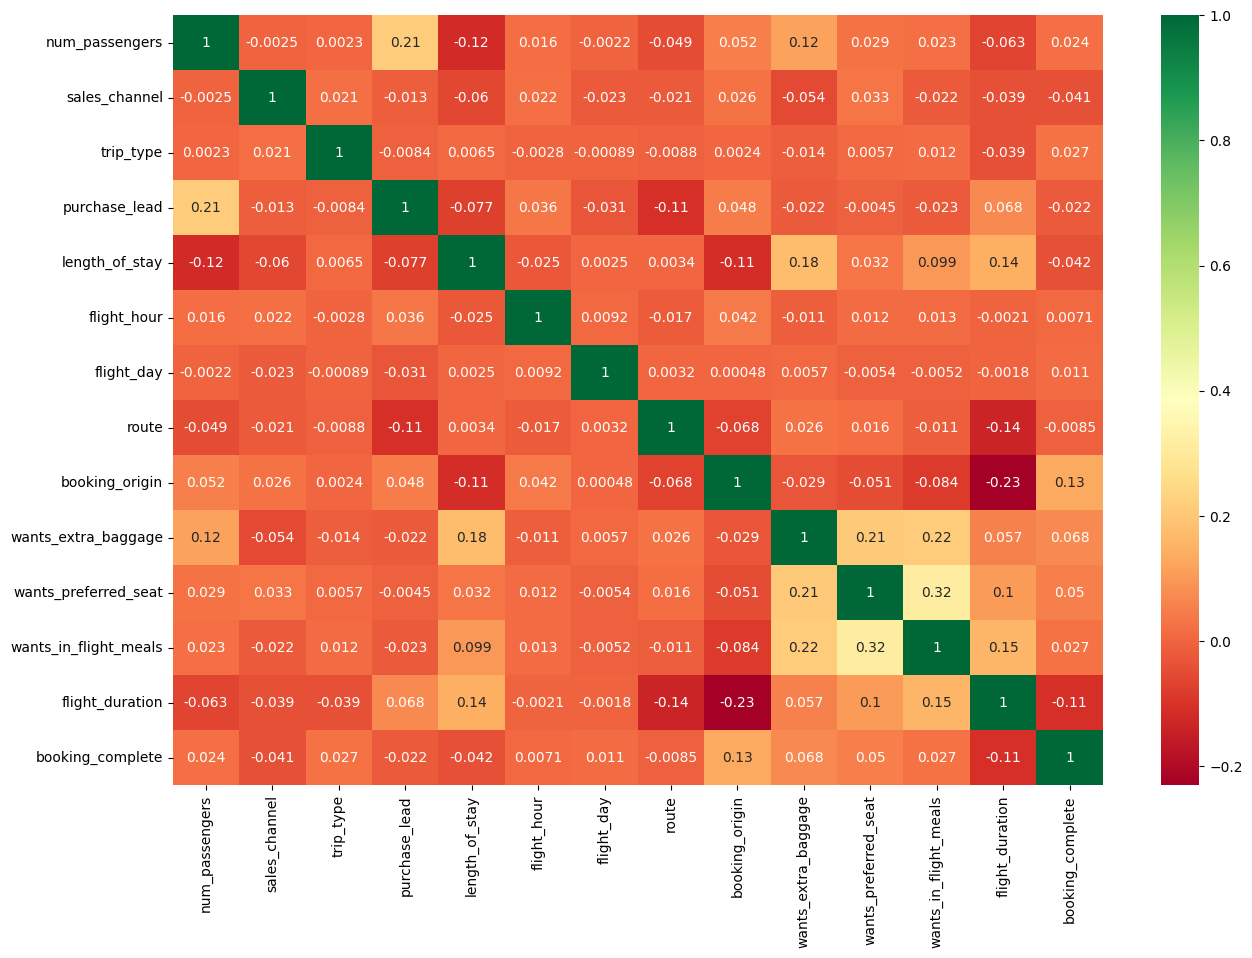

In [28]:
corrmat = scaled_df.corr()
corr_features = corrmat.index
plt.figure(figsize=(15,10))
# plot heatmap
corr_map = sns.heatmap(scaled_df[corr_features].corr(), annot=True, cmap="RdYlGn")

In [29]:
X = scaled_df.drop(columns=['booking_complete'])
y = scaled_df['booking_complete']

In [34]:
# Feature importance
from sklearn.ensemble import ExtraTreesRegressor
model =  ExtraTreesRegressor()
model.fit(X, y)

ExtraTreesRegressor()

In [35]:
print(model.feature_importances_)

[0.06883277 0.01191227 0.00221411 0.16696593 0.13843065 0.14922437
 0.11005647 0.12997914 0.10354737 0.01046733 0.0123662  0.02609136
 0.06991203]


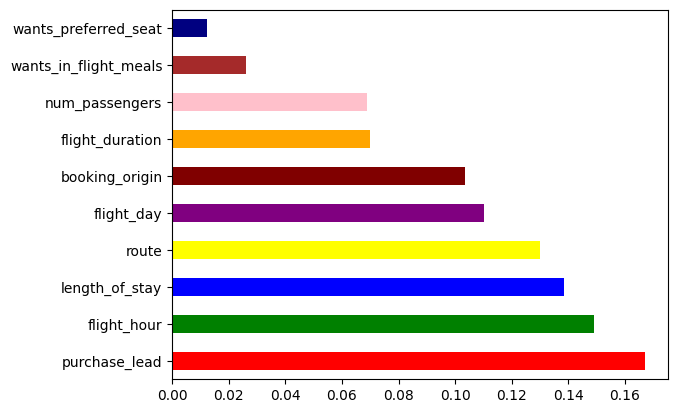

In [36]:
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
colors = ['red', 'green', 'blue', 'yellow', 'purple', 'maroon', 'orange', 'pink', 'brown', 'navy']
feat_importances.nlargest(10).plot(kind='barh', color=colors)
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [43]:
X_train.shape, X_test.shape

((40000, 13), (10000, 13))

In [44]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

y_train, y_test

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 0], dtype=int64))

## Hyperparameter Tuning

In [70]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [46]:
rf = RandomForestClassifier(random_state=6)

In [47]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=6)

In [48]:
# score without hyperparameter tuning
rf.score(X_test, y_test)

0.8512

In [57]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# Number of features to consider at every split
max_features = ['sqrt', 'log2']  # Ganti 'auto' dengan 'sqrt' atau 'log2'

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [58]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
}
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['sqrt', 'log2'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [49]:
# Hyperparameter tuning for Random Forest Classifier
# Create the random grid
# random_grid = {'n_estimators': [90,100, 115, 130],
#                'max_features': ['auto', 'log2'],
#                'max_depth': range(2, 20, 1),
#                'min_samples_split': range(2, 10, 1),
#                'min_samples_leaf': range(1, 10, 1),
#                'criterion': ['gini', 'entropy']
# }
# random_grid

{'n_estimators': [90, 100, 115, 130],
 'max_features': ['auto', 'log2'],
 'max_depth': range(2, 20),
 'min_samples_split': range(2, 10),
 'min_samples_leaf': range(1, 10),
 'criterion': ['gini', 'entropy']}

In [59]:
rf_random = RandomForestClassifier()

In [62]:
grid_search = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, cv=5, verbose=2, n_iter=20, n_jobs=1)

In [63]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  11.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  11.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  12.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  12.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=500; total time=  12.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=  26.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=1100; total time=  27.0s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimato

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=6),
                   n_iter=20, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   verbose=2)

## Model Evaluation

In [64]:
grid_search.best_params_

{'n_estimators': 100,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 15}

In [66]:
grid_search.best_score_

0.8520750000000001

In [75]:
prediction = grid_search.predict(X_test)

print('Accuracy: ', accuracy_score(y_test, prediction))
print('AUC Score: ', roc_auc_score(y_test, prediction))
print('f1 Score: ', f1_score(y_test, prediction))
print('Precission Score: ', precision_score(y_test, prediction))
print('Recall Score: ', recall_score(y_test, prediction))

Accuracy:  0.8502
AUC Score:  0.5171770425138373
f1 Score:  0.07416563658838071
Precission Score:  0.5714285714285714
Recall Score:  0.03965631196298744


## Confusion Matrix

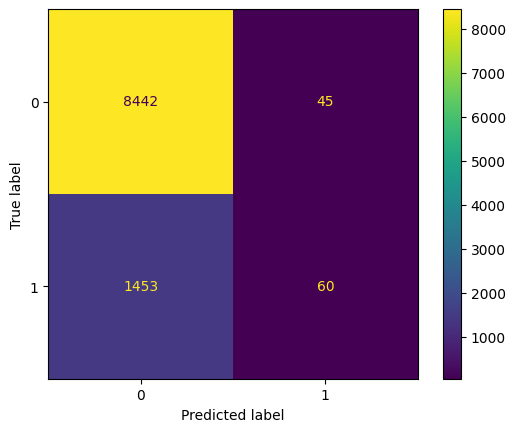

In [76]:
cm = confusion_matrix(y_test, prediction)
cm_disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = grid_search.classes_)
cm_disp.plot()
plt.show()

In [77]:
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92      8487
           1       0.57      0.04      0.07      1513

    accuracy                           0.85     10000
   macro avg       0.71      0.52      0.50     10000
weighted avg       0.81      0.85      0.79     10000



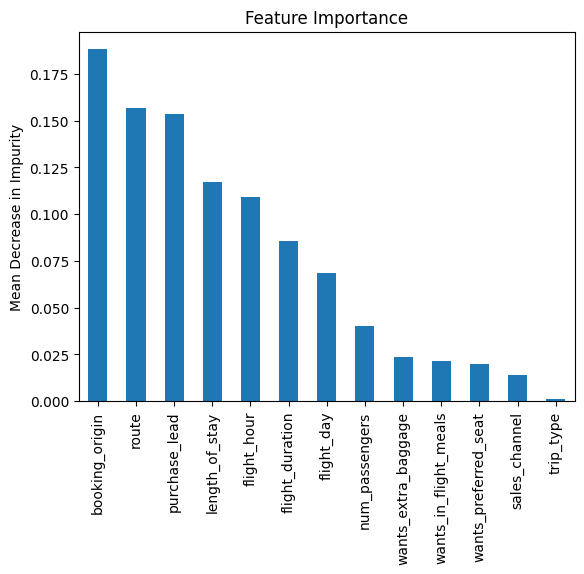

In [78]:
importance = grid_search.best_estimator_.feature_importances_
rf_importance = pd.Series(importance, index = X_train.columns)

# Sort the feature importances in descending order
sorted_rf_importance = rf_importance.sort_values(ascending=False)

fig, ax = plt.subplots()
sorted_rf_importance.plot.bar(ax=ax)
ax.set_title('Feature Importance')
ax.set_ylabel('Mean Decrease in Impurity')

plt.show()  # Display the plot